<a href="https://colab.research.google.com/github/Kunaltembhare003/Cardiovascular-heart-diseases/blob/main/Cardiovascular_heart_diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
df = pd.read_csv("/content/drive/MyDrive/alma_better/capstone_project/Cardiovascular_Risk_Prediction/data_cardiovascular_risk.csv")

In [3]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [4]:
df.shape

(3390, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [6]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [7]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


#univariant analsysis

In [8]:
#size of graph
plt.rcParams["figure.figsize"] = [10,6]

##column 2: age 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


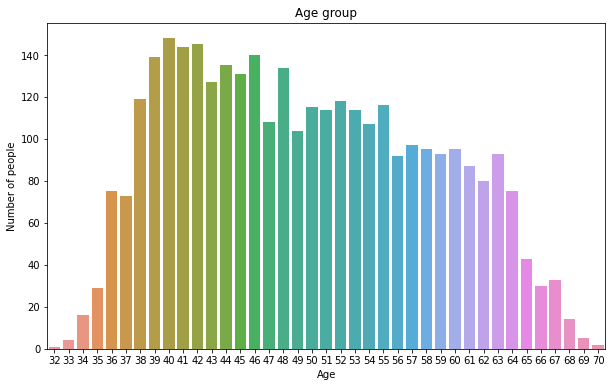

In [9]:
sns.countplot(df.age)
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.title("Age group")
plt.show()

##coloum 3: education

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


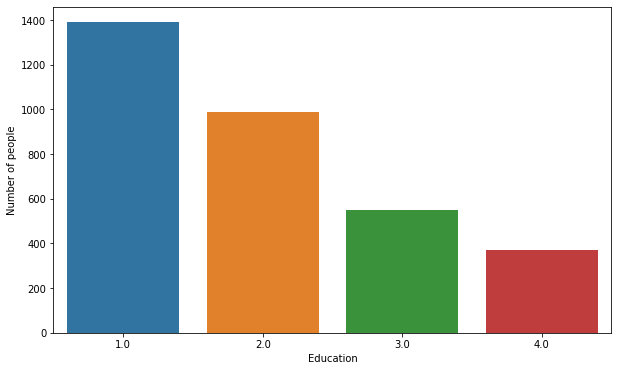

In [10]:
sns.countplot(df.education)
plt.xlabel("Education")
plt.ylabel("Number of people")
plt.show()

##column : is smoking

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


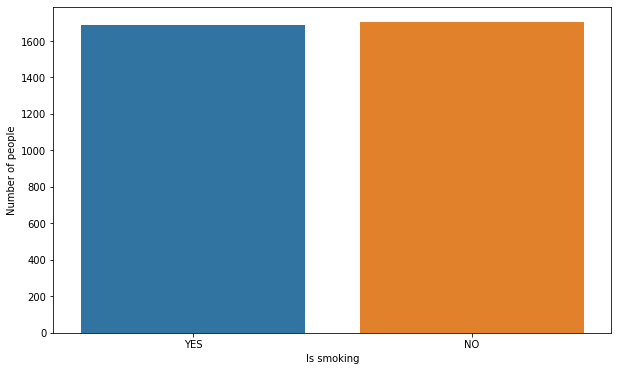

In [11]:
sns.countplot(df.is_smoking)
plt.xlabel("Is smoking")
plt.ylabel("Number of people")
plt.show()

##column 4: CigsperDay

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


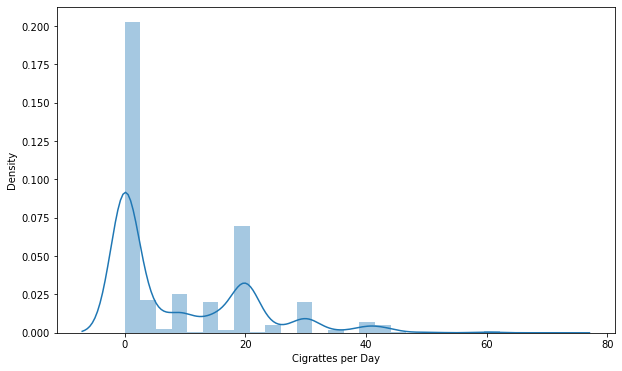

In [12]:
sns.distplot(df.cigsPerDay)
plt.xlabel("Cigrattes per Day")
#plt.ylabel("Number of people")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


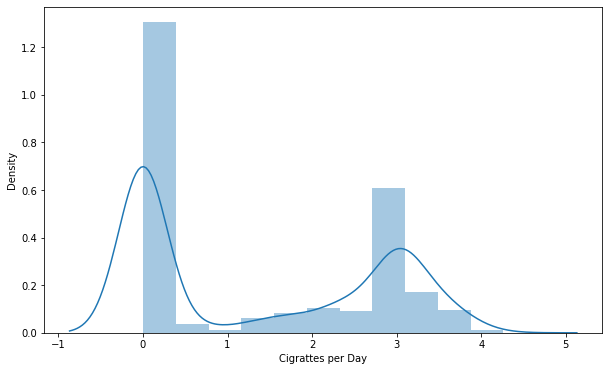

In [13]:
sns.distplot(np.log1p(df.cigsPerDay))
plt.xlabel("Cigrattes per Day")
#plt.ylabel("Number of people")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


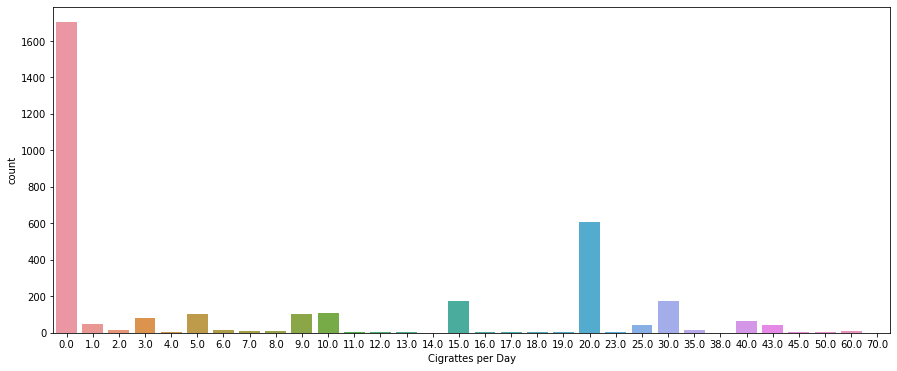

In [14]:
plt.rcParams["figure.figsize"] = [15,6]
sns.countplot(df.cigsPerDay)
plt.xlabel("Cigrattes per Day")
#plt.ylabel("Number of people")
plt.show()

##coloumn 5: BPmeds

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


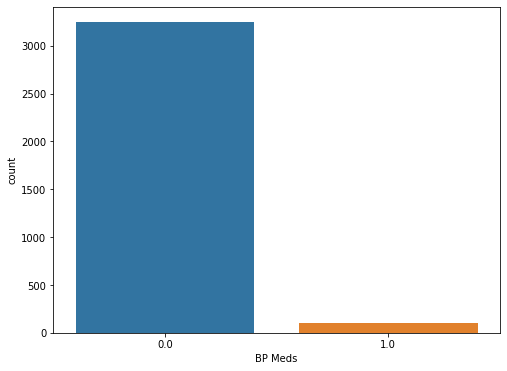

In [15]:
plt.rcParams["figure.figsize"] = [8,6]
sns.countplot(df.BPMeds)
plt.xlabel("BP Meds")
plt.show()

## columns 6: Prevalent Strokes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


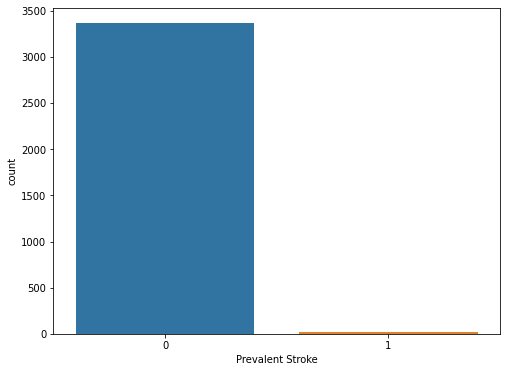

In [16]:
sns.countplot(df.prevalentStroke)
plt.xlabel("Prevalent Stroke")
plt.show()

## column 7: Prevalent hyp

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


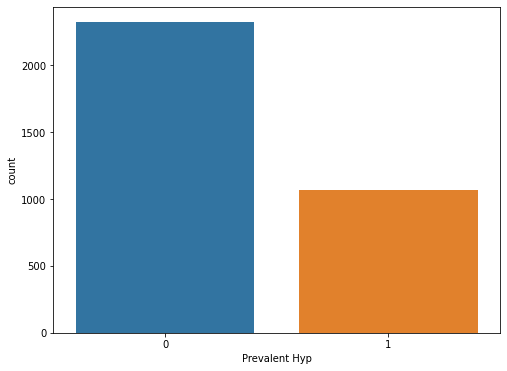

In [17]:
sns.countplot(df.prevalentHyp)
plt.xlabel("Prevalent Hyp")
plt.show()

## columns 8: Diabetes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


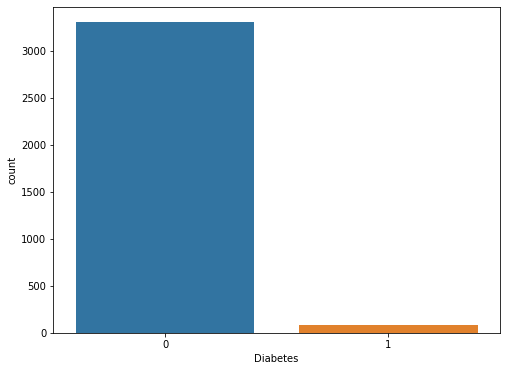

In [18]:
sns.countplot(df.diabetes)
plt.xlabel("Diabetes")
plt.show()

## Columns 9: totChol

In [19]:
df.totChol.describe([0.50,0.75,0.90,0.95,0.99])

count    3352.000000
mean      237.074284
std        45.247430
min       107.000000
50%       234.000000
75%       264.000000
90%       292.000000
95%       313.450000
99%       355.490000
max       696.000000
Name: totChol, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


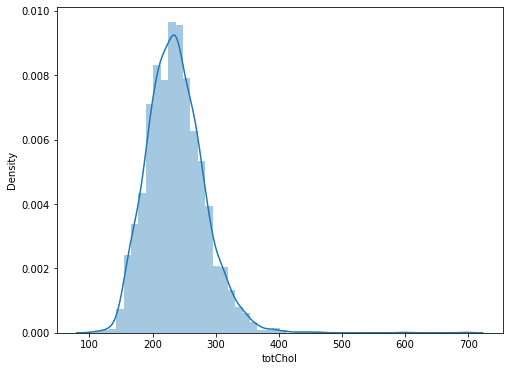

In [20]:
sns.distplot(df.totChol )
plt.xlabel("totChol")
plt.show()

## coloumns 9: sysBP

In [21]:
df.sysBP.describe([0.50,0.75,0.90,0.95,0.99])

count    3390.00000
mean      132.60118
std        22.29203
min        83.50000
50%       128.50000
75%       144.00000
90%       162.50000
95%       175.27500
99%       202.05500
max       295.00000
Name: sysBP, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


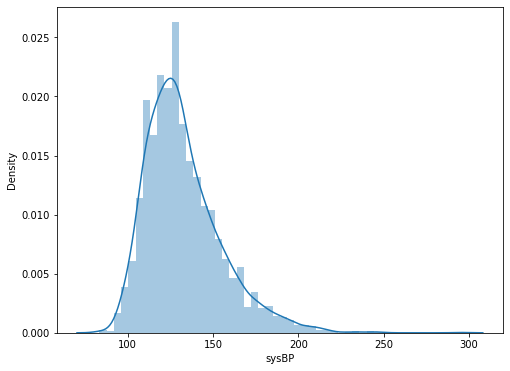

In [22]:
sns.distplot(df.sysBP )
plt.xlabel("sysBP")
plt.show()

##columns 10: diaBP

In [23]:
df.diaBP.describe([0.50,0.75,0.90,0.95,0.99])

count    3390.000000
mean       82.883038
std        12.023581
min        48.000000
50%        82.000000
75%        90.000000
90%        98.000000
95%       105.000000
99%       119.110000
max       142.500000
Name: diaBP, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


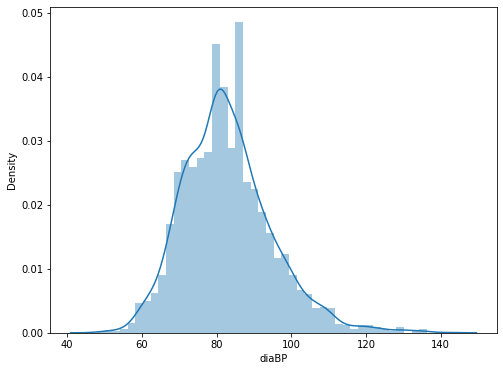

In [24]:
sns.distplot(df.diaBP )
plt.xlabel("diaBP")
plt.show()

##coloumns 11: BMI

In [25]:
df.BMI.describe([0.50,0.75,0.90,0.95,0.99])

count    3376.000000
mean       25.794964
std         4.115449
min        15.960000
50%        25.380000
75%        28.040000
90%        30.875000
95%        32.852500
99%        38.855000
max        56.800000
Name: BMI, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


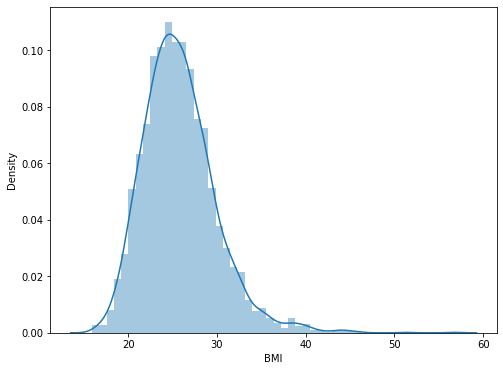

In [26]:
sns.distplot(df.BMI )
plt.xlabel("BMI")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


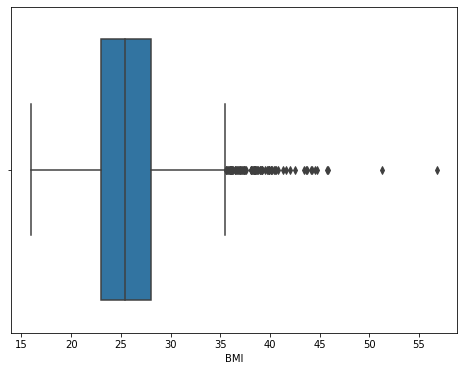

In [27]:
sns.boxplot(df.BMI )
plt.xlabel("BMI")
plt.show()

## coloumns 12: HeartRate

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


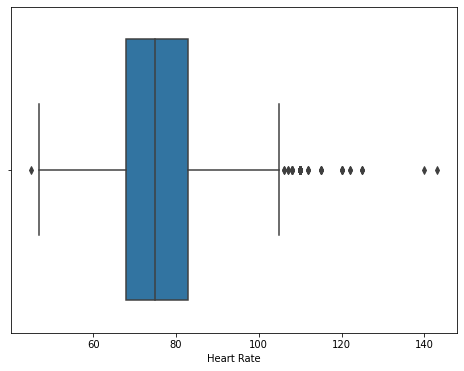

In [28]:
sns.boxplot(df.heartRate )
plt.xlabel("Heart Rate")
plt.show()

In [29]:
df.heartRate.describe([0.50,0.75,0.90,0.95,0.99])

count    3389.000000
mean       75.977279
std        11.971868
min        45.000000
50%        75.000000
75%        83.000000
90%        92.000000
95%        98.000000
99%       110.000000
max       143.000000
Name: heartRate, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


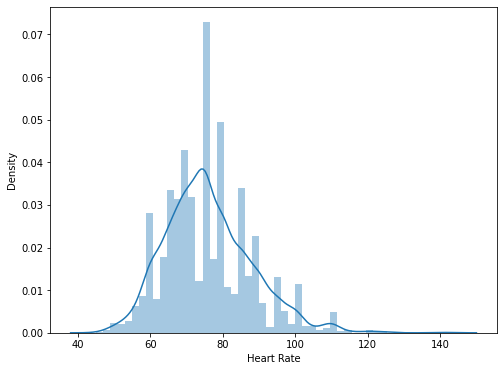

In [30]:
sns.distplot(df.heartRate )
plt.xlabel("Heart Rate")
plt.show()

##columns 13: Glucose

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


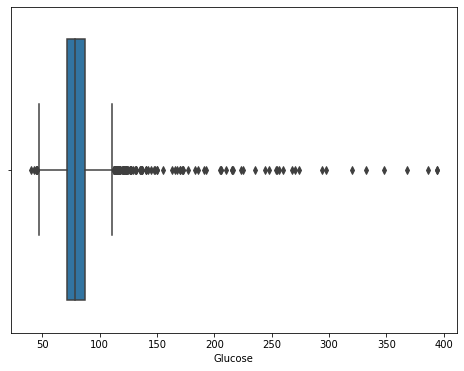

In [31]:
sns.boxplot(df.glucose )
plt.xlabel("Glucose")
plt.show()

In [32]:
df.glucose.describe([0.50,0.75,0.90,0.95,0.99])

count    3086.000000
mean       82.086520
std        24.244753
min        40.000000
50%        78.000000
75%        87.000000
90%        98.000000
95%       110.000000
99%       183.450000
max       394.000000
Name: glucose, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


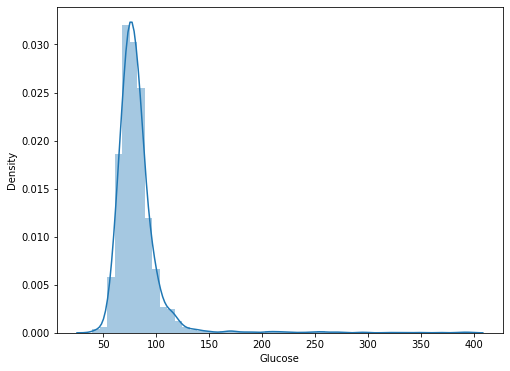

In [33]:
sns.distplot(df.glucose)
plt.xlabel("Glucose")
plt.show()

## coloumns 14:  TenyearCHD

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


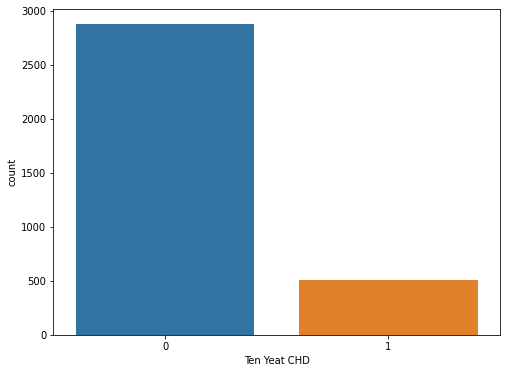

In [34]:
sns.countplot(df.TenYearCHD)
plt.xlabel("Ten Yeat CHD")
plt.show()

#bivariant analysis

## Age Vs TenYearCHD

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


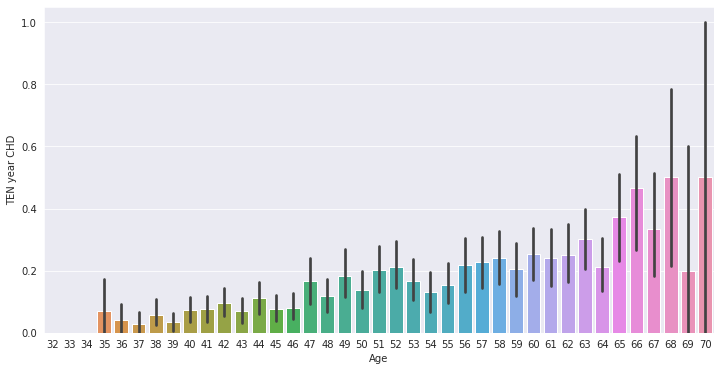

In [35]:
sns.set_style(style='darkgrid')
plt.figure(figsize = (12,6))
sns.barplot(df.age,df.TenYearCHD)
plt.xlabel('Age')
plt.ylabel('TEN year CHD')
plt.show()

## educaation Vs Ten Year CHD

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


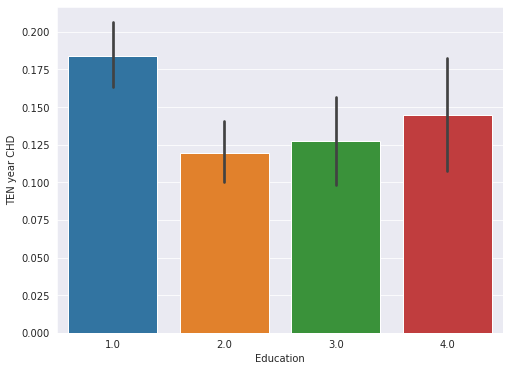

In [36]:
sns.barplot(df.education,df.TenYearCHD)
plt.xlabel('Education')
plt.ylabel('TEN year CHD')
plt.show()

## sex Vs Ten Year CHD

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


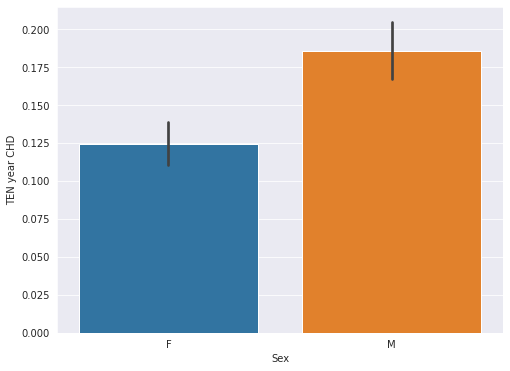

In [37]:
sns.barplot(df.sex,df.TenYearCHD)
plt.xlabel('Sex')
plt.ylabel('TEN year CHD')
plt.show()

## is_smoking Vs Ten year CHD

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


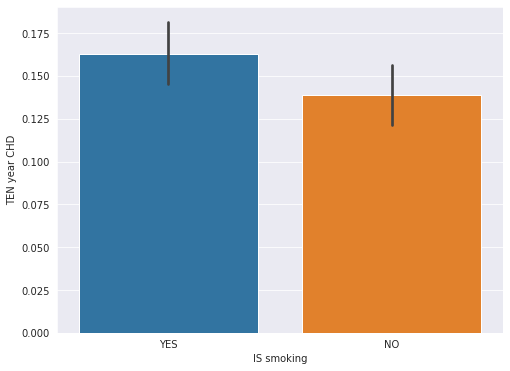

In [38]:
sns.barplot(df.is_smoking,df.TenYearCHD)
plt.xlabel('IS smoking')
plt.ylabel('TEN year CHD')
plt.show()

##cigratesperday Vs Ten year CHD

Text(0.5, 1.0, 'Line Plot')

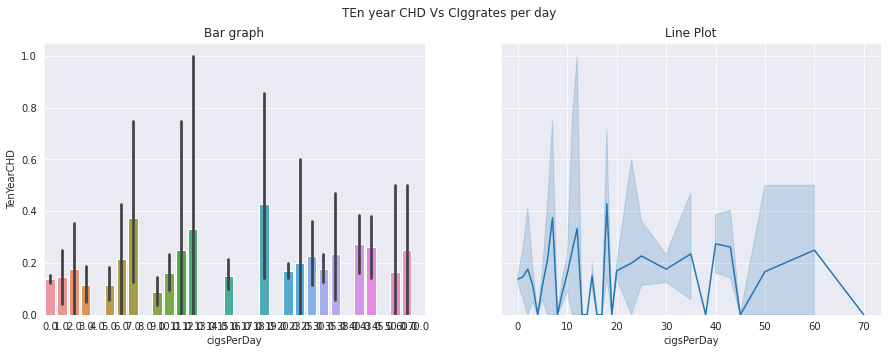

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('TEn year CHD Vs CIggrates per day')

sns.barplot(ax=axes[0], x='cigsPerDay',y='TenYearCHD',data=df)
axes[0].set_title('Bar graph')

sns.lineplot(ax=axes[1],  x='cigsPerDay',y='TenYearCHD',data=df)
axes[1].set_title('Line Plot')

## BPMeds Vs TenYearCHD

In [40]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


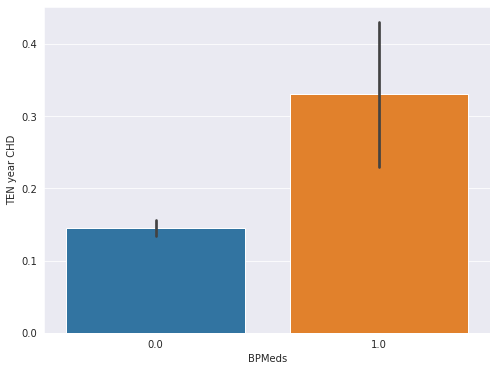

In [41]:
sns.barplot(df.BPMeds,df.TenYearCHD)
plt.xlabel('BPMeds')
plt.ylabel('TEN year CHD')
plt.show()

## prevalentStrokes Vs TenYearCHD

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


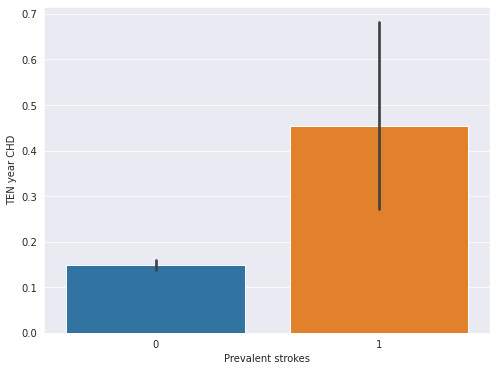

In [42]:
sns.barplot(df.prevalentStroke,df.TenYearCHD)
plt.xlabel('Prevalent strokes')
plt.ylabel('TEN year CHD')
plt.show()

##prevalentHyp Vs TenYearCHD

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


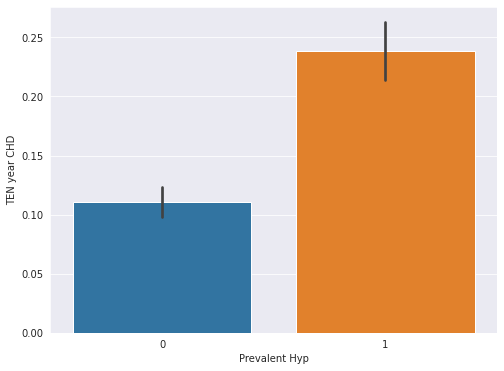

In [44]:
sns.barplot(df.prevalentHyp,df.TenYearCHD)
plt.xlabel('Prevalent Hyp')
plt.ylabel('TEN year CHD')
plt.show()

##diabetes Vs TenYearCHD

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


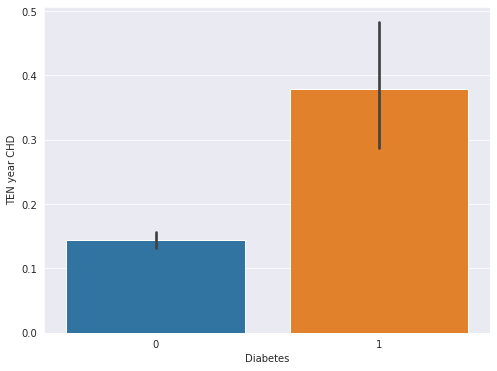

In [45]:
sns.barplot(df.diabetes,df.TenYearCHD)
plt.xlabel('Diabetes')
plt.ylabel('TEN year CHD')
plt.show()

## TOTChol Vs TenYearCHD

Text(0.5, 1.0, 'Line Plot')

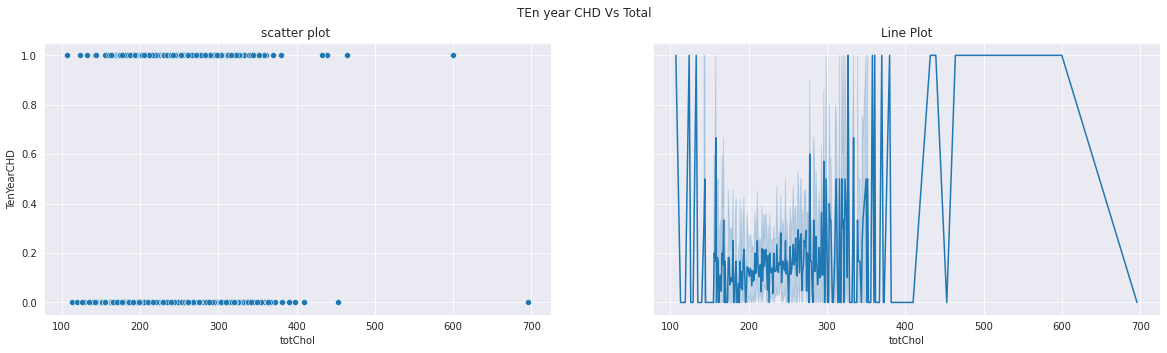

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
fig.suptitle('TEn year CHD Vs Total')

sns.scatterplot(ax=axes[0], x='totChol',y='TenYearCHD',data=df)
axes[0].set_title('scatter plot ')

sns.lineplot(ax=axes[1],  x='totChol',y='TenYearCHD',data=df)
axes[1].set_title('Line Plot')

##sysBP Vs TenYearCHD

In [50]:
df.sysBP.describe()

count    3390.00000
mean      132.60118
std        22.29203
min        83.50000
25%       117.00000
50%       128.50000
75%       144.00000
max       295.00000
Name: sysBP, dtype: float64

Text(0.5, 1.0, 'Line Plot')

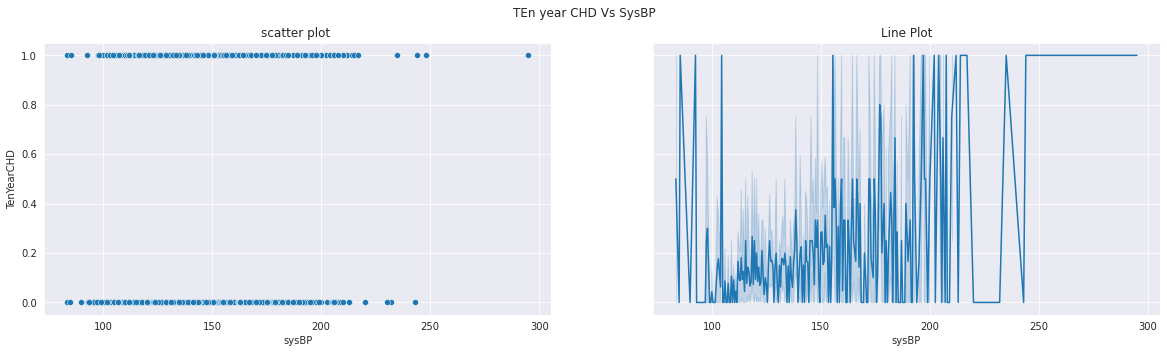

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
fig.suptitle('TEn year CHD Vs SysBP')

sns.scatterplot(ax=axes[0], x='sysBP',y='TenYearCHD',data=df)
axes[0].set_title('scatter plot ')

sns.lineplot(ax=axes[1],  x='sysBP',y='TenYearCHD',data=df)
axes[1].set_title('Line Plot')

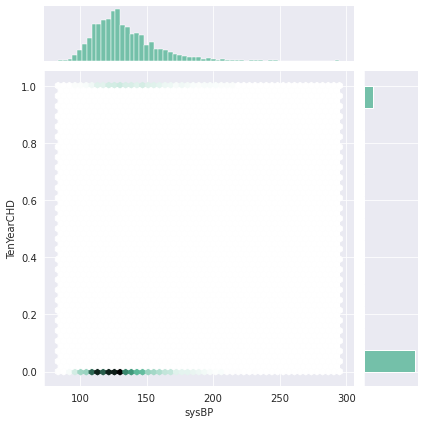

In [53]:
sns.jointplot(x=df.sysBP, y=df.TenYearCHD, kind="hex", color="#4CB391")


##diaBP Vs TenYearCHD

Text(0.5, 1.0, 'Line Plot')

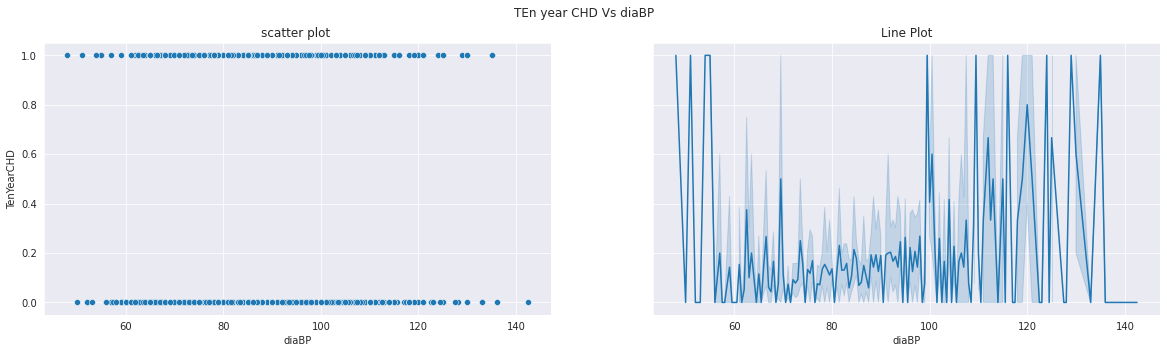

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
fig.suptitle('TEn year CHD Vs diaBP')

sns.scatterplot(ax=axes[0], x='diaBP',y='TenYearCHD',data=df)
axes[0].set_title('scatter plot ')

sns.lineplot(ax=axes[1],  x='diaBP',y='TenYearCHD',data=df)
axes[1].set_title('Line Plot')

Text(0.5, 1.0, 'joint plot ')

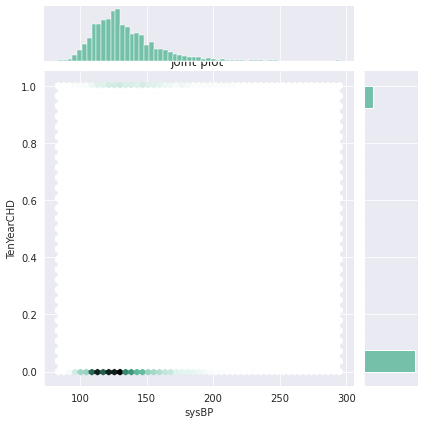

In [57]:
sns.jointplot(x=df.sysBP, y=df.TenYearCHD, kind="hex", color="#4CB391")
plt.title('joint plot ')

##diaBP Vs TenYearCHD

In [ ]:
##BMI Vs TenYearCHD

Text(0.5, 1.0, 'Line Plot')

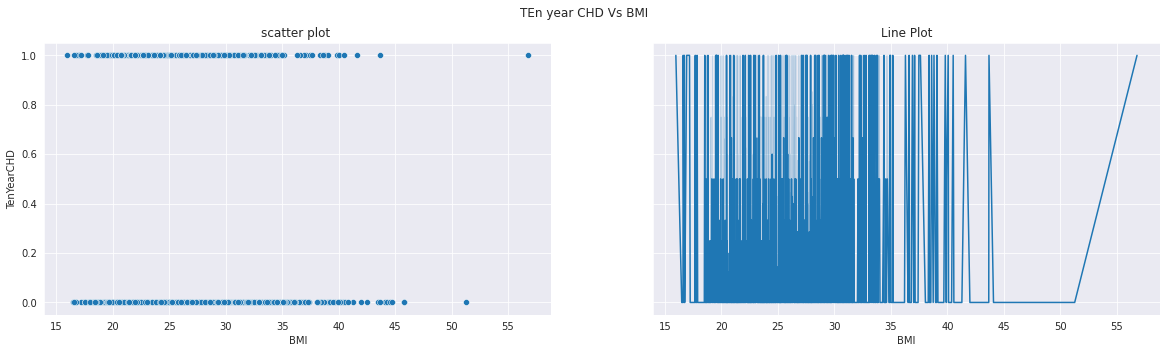

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
fig.suptitle('TEn year CHD Vs BMI')

sns.scatterplot(ax=axes[0], x='BMI',y='TenYearCHD',data=df)
axes[0].set_title('scatter plot ')

sns.lineplot(ax=axes[1],  x='BMI',y='TenYearCHD',data=df)
axes[1].set_title('Line Plot')

In [43]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

#